# Titanic Disaster Prediction Machine Learning


# Introduction

So here we are at the end of our course: Hacktiv8 Introduction to Python for Data Science. And to mark the end of our journey, each of us need to do final project. We're given several options of final projects as tools to see how far we've come and what we have learned during our two months course. As for me I choose Titanic - Machine Learning from Disaster. 
Why specific project? It's quite easy, but not so easy since there are steps needs to be taken before we employ any Machine Learning algorithms (loading data, descriptive statistic data, data types, checking any missing values and so on). The goal is simple, predict if a passenger will survive based on features we train.
As for the dataset, the dataset(s) consist of two data.
train.csv for the data we'll train and test.csv, for data we'll use to predict if a passenger will survive based on the algorithm we have trained.

# Importing Libraries

So to start with this project, the first thing first, importing all the necessary library that will be used for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

# Loading the Dataset 

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

train data has 891 rows and 12 columns, with 7 data consist of numeric data type (PassangerId, Survived, Pclass, Age, SibSp, Parch, Fare) and 5 object (strings data), (Name, Sex, Ticket, Cabin, Embarked)

In [8]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test.shape

(418, 11)

Test data has 418 rows and 11 columns, missing Survived columns. Off course Survived column doesn't exist since this is what we'll predict using machine learning

# Checking Missing Values

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, train has some missing values. Age has 177 missing values, cabin has 687 missing values, while embarked only has two missing values.

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Meanwhile Age column of test data only has 86 missing values while Cabin still the has the highest missing values, 327 values.

# Data Preprocessing

On train data, we'll drop Name column, Cabin (Cabin doesn't seem to show any significant values to be included in training the data) and Ticket

In [15]:
train2=train.drop(['Name','Cabin','Ticket'],axis=1)
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Next is converting Sex from string to numeric (integer) where male is 0 and female is 1

In [17]:
le = preprocessing.LabelEncoder()
train2['Sex'] = le.fit_transform(train2['Sex'])
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Next is to fill the missing values. for Age, we use mean to fill the missing values, while embarked (with two missing values) filled with mode.

In [18]:
train2['Age'].fillna(train2['Age'].mean(), inplace=True)
train2['Embarked'].fillna(train2['Embarked'].mode()[0], inplace=True)

We'll check again the missing values. As we can see, now there's no missing values anymore.

In [19]:
train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Final touch for train data is to transform the Embarked which data type is object (string) to numeric (integer)

In [21]:
train2['Embarked'] = le.fit_transform(train2['Embarked'])
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [22]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Now we'll use pair plot to see if there's any good correlation of each columns to one another. From these plots we can see that's is almost no correlation of each column toward each columns.

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   29.699118   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

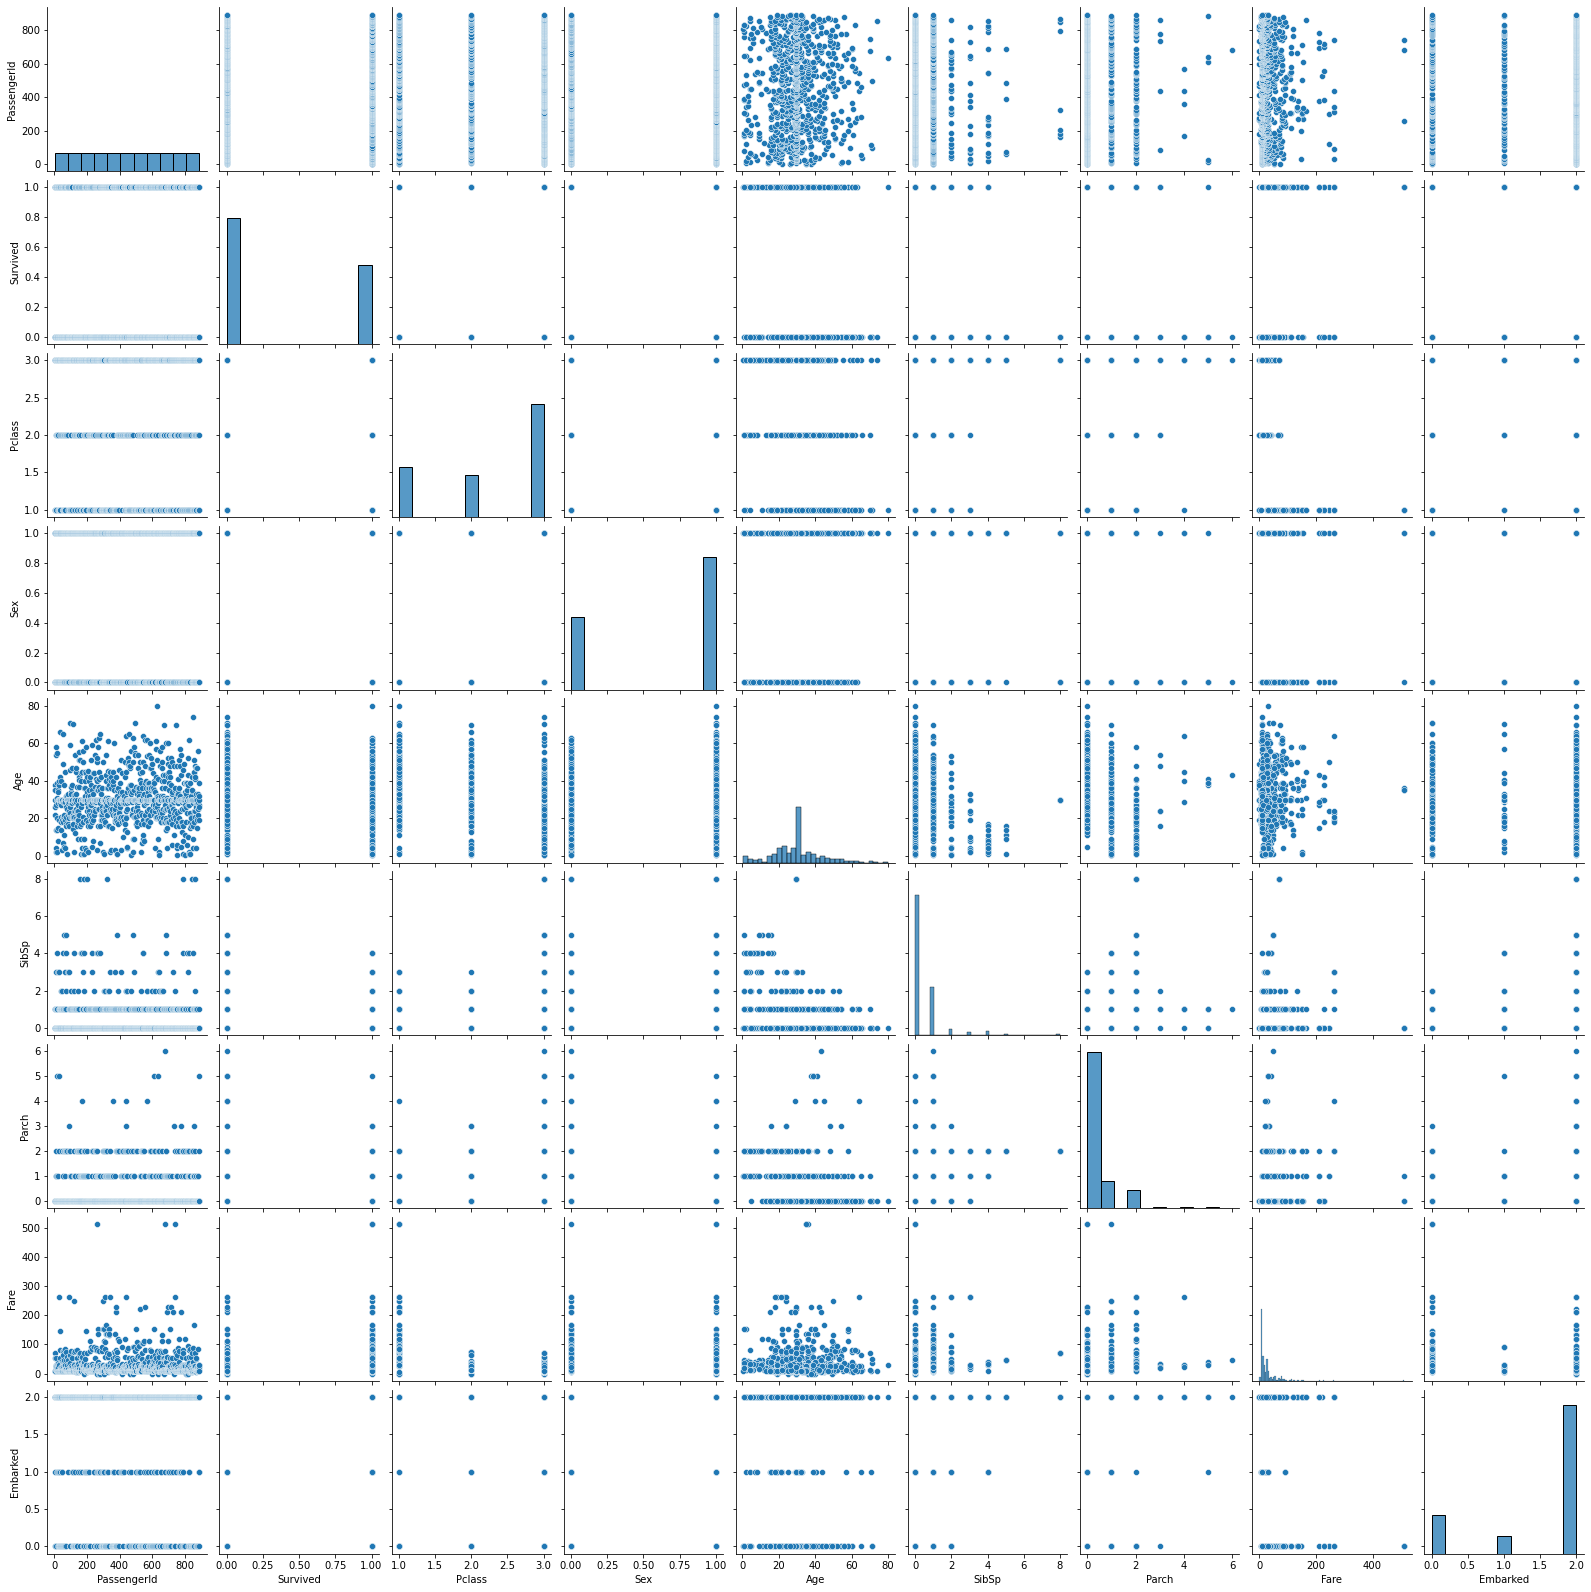

In [23]:
sum_titanic = train2.describe()
print(sum_titanic)

# Create a pairwise scatter plot to explore the data
# ... YOUR CODE FOR TASK 3 ...
sns.pairplot(data=train2)

From histogram plots, we see some intersting fact. Most of the passenger is between 20 to 40 years old. We also see most have 0 to 1 sibling. It's intersting to see number of sibling effect the survival rate. Unfortunately based on the scatter plot above, seems that the correlation between number of sibling to survival rate is quite low

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

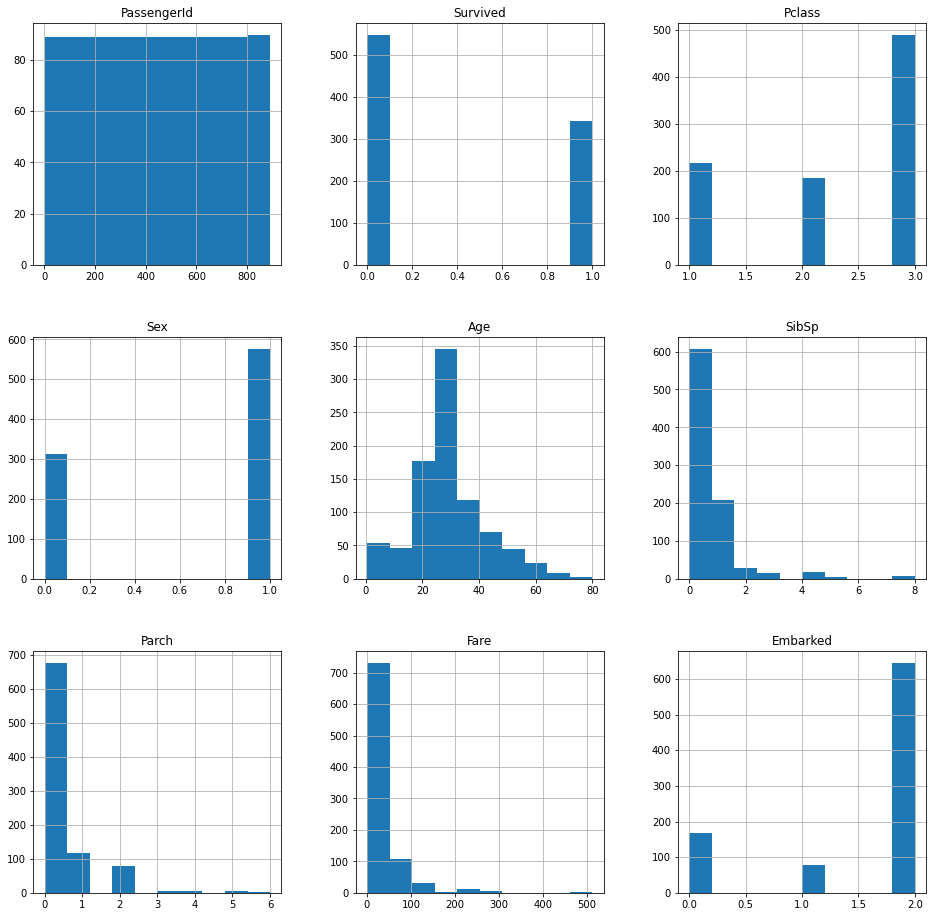

In [24]:
train2.hist(figsize = (16,16))

To re-check we use heatmap to confirm our hypothesis that there's no correlation of each column to each columns. As we see, that the heatmap shows pretty low correlation of each columns to other columns

<AxesSubplot:>

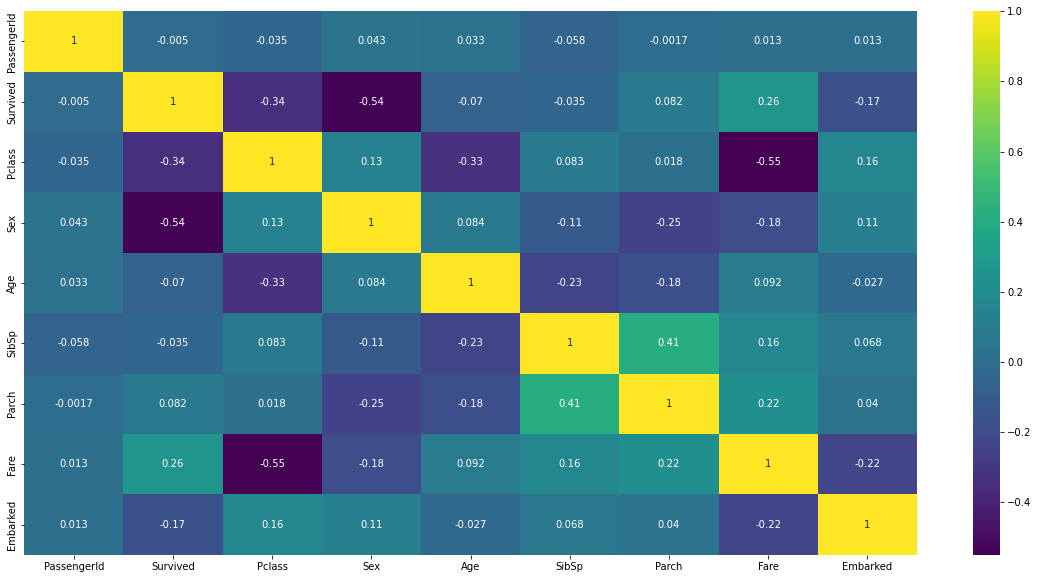

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train2.corr(), annot=True, cmap='viridis')

Now, we'll repeat the same preprocessing for the test data. As train data, Name, Cabin and Ticket are dropped from test data.

In [26]:
test2=test.drop(['Name','Cabin','Ticket'],axis=1)
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


Just like what we did earlier with train data, Sex is converted from string to integer (non numeric to numeric)

In [27]:
lex = preprocessing.LabelEncoder()
test2['Sex'] = lex.fit_transform(test2['Sex'])
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


And we need check missing values as well in test data. As we can see that there are less missing values. only 86 missing data of Age and 1 missing value from Fare

In [28]:
test2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

For age, just like we did before with train data, age is filled with mean and fare with mode

In [29]:
test2['Age'].fillna(test2['Age'].mean(), inplace=True)
test2['Fare'].fillna(test2['Fare'].mode()[0], inplace=True)

In [30]:
test2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Now we convert Embarked columns from string to integer

In [31]:
test2['Embarked'] = lex.fit_transform(test2['Embarked'])
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


Now is time to devine the features (Xtrain) and target (ytrain) from train data (now is called train2)

In [32]:
Xtrain =train2.drop(['Survived','PassengerId'],axis=1)
ytrain = train2[['Survived']]


We use the train test split. For this case, we use 80 percent data for training and 20 percent data for testing

In [33]:

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.2, random_state=0)

Since the case is part of Clasffication, we try six classification algorithms to find the best machine learning model for our case

# Logistic Regression

In [34]:

logreg=LogisticRegression(solver='liblinear', random_state=0).fit(Xtrain,ytrain)
pred_cv=logreg.predict(X_test)
model=accuracy_score(y_test,pred_cv)
matrix=confusion_matrix(y_test,pred_cv)
print(model)
print(matrix)

0.7988826815642458
[[94 16]
 [20 49]]


/Users/rianrachmanto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

In [35]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(Xtrain,ytrain)
pred_cv2=knn.predict(X_test)
model2=accuracy_score(y_test,pred_cv2)
matrix2=confusion_matrix(y_test,pred_cv2)
print(model2)
print(matrix2)

0.7821229050279329
[[103   7]
 [ 32  37]]


/Users/rianrachmanto/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# SVM

In [36]:
svm_model=svm.SVC()
svm_model.fit(Xtrain,ytrain)
pred_cv3=svm_model.predict(X_test)
model3=accuracy_score(y_test,pred_cv3)
matrix3=confusion_matrix(y_test,pred_cv3)
print(model3)
print(matrix3)

0.7262569832402235
[[104   6]
 [ 43  26]]


/Users/rianrachmanto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive Bayes

In [37]:
gnb=GaussianNB()
gnb.fit(Xtrain,ytrain)
pred_cv4=gnb.predict(X_test)
model4=accuracy_score(y_test,pred_cv4)
matrix4=confusion_matrix(y_test,pred_cv4)
print(model4)
print(matrix4)

0.7988826815642458
[[89 21]
 [15 54]]


/Users/rianrachmanto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

In [38]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,ytrain)
pred_cv5=dt.predict(X_test)
model5=accuracy_score(y_test,pred_cv5)
matrix5=confusion_matrix(y_test,pred_cv5)
print(model5)
print(matrix5)

0.9888268156424581
[[109   1]
 [  1  68]]


# Random Forest

In [39]:
rfs=RandomForestClassifier()
rfs.fit(Xtrain,ytrain)
pred_cv6=rfs.predict(X_test)
model6=accuracy_score(y_test,pred_cv6)
matrix6=confusion_matrix(y_test,pred_cv6)
print(model6)
print(matrix6)

0.9832402234636871
[[108   2]
 [  1  68]]


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_4387/3977183143.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(Xtrain,ytrain)


Below is the compilation of accuracy of each algorithms. Quite odd that Logistic regression accuracy is exactly the same with Naive Bayes, and Decision Tree with Forest Random. Highest accuracy are Decision Tree and Forest Random (both 99% accuracy). Either algorithm is ok to choose (for this case we use forest random)

In [40]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree','Forest Random'],
    'Score': [model,model2,model3,model4,model5,model6]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
0.988827,Decision Tree
0.983240,Forest Random
0.798883,Logistic Regression
0.798883,Naive Bayes
0.782123,KNN
0.726257,SVM


Now we use the test data to predict using the model that we have trained. The first thing first, is to assign the Passenger Id, that latter on we embed to test data that we have predicted. 

In [41]:
titanic_passenger_id = test2['PassengerId']
test3=test2.drop(['PassengerId'],axis=1)
test3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


Now, we feed the test data to predict the Survival prediction using Forest Random model that we have trained earlier.

In [42]:
test3['Survived']=rfs.predict(test3)


As we can see below by using test data as new data and random forest model that we have trained, we have predicted the likelihood the passenger survive. The result is shown in column Survived

In [43]:
test3

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.50000,0,0,7.8292,1,0
1,3,0,47.00000,1,0,7.0000,2,0
2,2,1,62.00000,0,0,9.6875,1,0
3,3,1,27.00000,0,0,8.6625,2,1
4,3,0,22.00000,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,0
414,1,0,39.00000,0,0,108.9000,0,1
415,3,1,38.50000,0,0,7.2500,2,0
416,3,1,30.27259,0,0,8.0500,2,0


Now we embed the Passenger Id back to to data so now we have predicted value of weather the passenger survived or not

In [44]:
test3.insert(loc=0, column = 'PassengerId', value=titanic_passenger_id)

In [45]:
test3

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.50000,0,0,7.8292,1,0
1,893,3,0,47.00000,1,0,7.0000,2,0
2,894,2,1,62.00000,0,0,9.6875,1,0
3,895,3,1,27.00000,0,0,8.6625,2,1
4,896,3,0,22.00000,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2,0
414,1306,1,0,39.00000,0,0,108.9000,0,1
415,1307,3,1,38.50000,0,0,7.2500,2,0
416,1308,3,1,30.27259,0,0,8.0500,2,0


Now as for final step, we will save the model using pickle

In [46]:
pickle.dump(rfs,open('model_classifier.pkl','wb'))